In [ ]:
#!pip install pycaret

### Import Required Packages and load data

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.shape

(1338, 7)

In [3]:
data_seen = data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data_seen.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1204, 7)
Unseen Data For Predictions: (134, 7)


### Model Buliding

In [4]:
from pycaret.regression import *

### a) Setting up Environment in Pycaret

In [5]:
exp_101 = setup(data_seen, target = 'charges', session_id = 123,normalize = True,polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1204, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
exp_101[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'region_southeast_multiply_smoker_no',
       'age_0.0_multiply_smoker_no', 'children_0_multiply_bmi_Power2',
       'smoker_no_multiply_bmi_Power2', 'children_2_multiply_bmi_Power2',
       'sex_female_multiply_bmi_Power2',
       'region_southeast_multiply_bmi_Power2',
       'age_Power2_multiply_bmi_Power2', 'bmi_Power2_multiply_age_7.0',
       'smoker_no_multiply_sex_female', 'smoker_no_multiply_children_0',
       'smoker_no_multiply_age_Power2', 

#### Creating List of models

In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2543.24,2.08494e+07,4490.23,0.8482,0.4363,0.3077
1,Bayesian Ridge,2956.23,2.18053e+07,4631.66,0.8427,0.4359,0.3315
2,Ridge Regression,2952.75,2.17998e+07,4630.66,0.8427,0.4366,0.3308
3,Lasso Regression,2935.56,2.1852e+07,4634.97,0.8422,0.44,0.3265
4,Lasso Least Angle Regression,2926.45,2.18664e+07,4637.58,0.8419,0.4258,0.3278
5,Gradient Boosting Regressor,2590.54,2.18038e+07,4601.4,0.8416,0.4436,0.314
6,CatBoost Regressor,2598.14,2.20789e+07,4628.13,0.8399,0.4465,0.3083
7,Random Forest,2519.44,2.22023e+07,4638.67,0.8389,0.4461,0.2975
8,TheilSen Regressor,2921.99,2.30921e+07,4773.04,0.8341,0.4737,0.3014
9,Light Gradient Boosting Machine,2830.77,2.306e+07,4726.35,0.8323,0.5117,0.3601


### Choose the top model

In [8]:
egb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2607.1421,1.864042e+07,4317.4552,0.8812,0.4379,0.3268
1,1823.7825,7.676067e+06,2770.5717,0.9594,0.3072,0.2593
2,2474.1612,1.566832e+07,3958.3223,0.8787,0.4083,0.3278
3,3004.7836,2.922324e+07,5405.8520,0.7481,0.5352,0.3309
4,2915.7857,2.968932e+07,5448.7910,0.8121,0.4496,0.2422
5,2563.9432,1.981406e+07,4451.2992,0.8622,0.4381,0.3229
6,2757.9862,2.291073e+07,4786.5157,0.8741,0.4494,0.3484
7,2598.6851,2.268354e+07,4762.7243,0.7879,0.4478,0.3148
8,2207.1466,1.284063e+07,3583.3824,0.9366,0.4184,0.3646
9,2479.0279,2.934776e+07,5417.3569,0.7420,0.4715,0.2393


### Tuning Model

In [9]:
tune_egb = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3155.3129,2.388727e+07,4887.4603,0.8478,0.6089,0.3922
1,2068.6468,9.161343e+06,3026.7711,0.9515,0.3785,0.3166
2,2876.1344,2.343361e+07,4840.8271,0.8185,0.5200,0.4178
3,3451.1642,3.625178e+07,6020.9454,0.6875,0.6083,0.4026
4,3229.7538,3.506952e+07,5921.9524,0.7781,0.5640,0.2809
5,2806.8207,2.208796e+07,4699.7831,0.8464,0.4845,0.3669
6,3348.0349,3.031402e+07,5505.8173,0.8334,0.5553,0.4597
7,2891.2639,2.557495e+07,5057.1686,0.7608,0.4946,0.3601
8,2372.2925,1.573322e+07,3966.5125,0.9223,0.4667,0.3937
9,2879.2878,3.327099e+07,5768.1008,0.7075,0.5463,0.2911


In [10]:
print(tune_egb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


### Plot a model

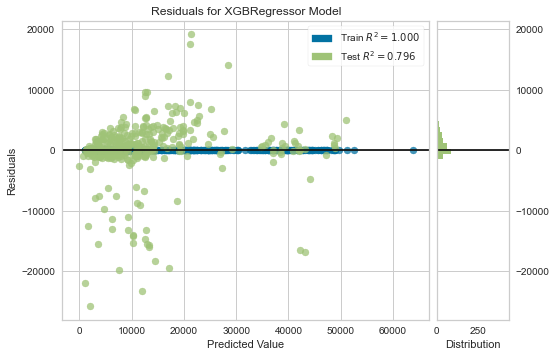

In [11]:
plot_model(tune_egb)

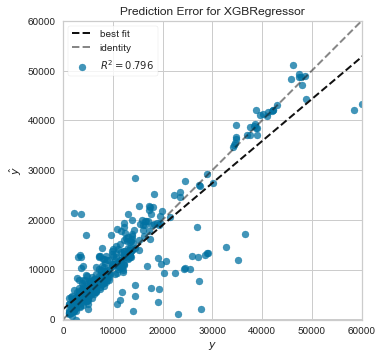

In [12]:
plot_model(tune_egb, plot = 'error')

### Feature Importance Plot

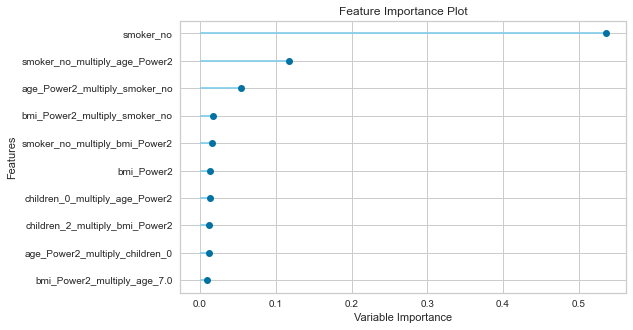

In [13]:
plot_model(tune_egb, plot='feature')

### Predict on Test/Hold-out sample

In [14]:
predict_model(tune_egb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,2894.1259,2.692058e+07,5188.5047,0.796,0.5238,0.3454


### Finalized model

In [15]:
final_egb = finalize_model(tune_egb)
print(final_egb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


In [16]:
unseen_predictions = predict_model(final_egb, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,female,27.280,3,yes,southeast,18223.45120,18186.380859
1,35,male,17.860,1,no,northwest,5116.50040,5116.435547
2,59,female,34.800,2,no,southwest,36910.60803,36910.515625
3,36,male,33.400,2,yes,southwest,38415.47400,38415.496094
4,37,female,25.555,1,yes,northeast,20296.86345,20296.833984


### Save model

In [19]:
save_model(final_egb,'Final Model Prod 14June2020')

Transformation Pipeline and Model Succesfully Saved


### To load a model

In [22]:
from pycaret.regression import *

In [23]:
final_egb = load_model('Final Model Prod 14June2020')

Transformation Pipeline and Model Sucessfully Loaded
[10:55:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
data= pd.read_csv()

,age,sex,bmi,children,smoker,region,charges
0,18,female,27.280,3,yes,southeast,18223.45120
1,35,male,17.860,1,no,northwest,5116.50040
2,59,female,34.800,2,no,southwest,36910.60803
3,36,male,33.400,2,yes,southwest,38415.47400
4,37,female,25.555,1,yes,northeast,20296.86345


In [25]:
unseen_predictions = predict_model(final_egb, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,female,27.280,3,yes,southeast,18223.45120,18186.380859
1,35,male,17.860,1,no,northwest,5116.50040,5116.435547
2,59,female,34.800,2,no,southwest,36910.60803,36910.515625
3,36,male,33.400,2,yes,southwest,38415.47400,38415.496094
4,37,female,25.555,1,yes,northeast,20296.86345,20296.833984


In [ ]:
# import requests
# url = 'https://pycaret-insurance.herokuapp.com/predict_api'
# pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
# print(pred.json())